In [2]:
#Notebooks for data exploration and cleanup
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from matplotlib.dates import DateFormatter
from scipy.stats import linregress 
import warnings
import json
import random as random
import gmaps
from pprint import pprint
from config import fapi_key
from config import gkey
from pprint import pprint

fapi_key = '8an2jD3FIACfSLKFysYCZFR5DRx84jJTL4Q5li1q'

warnings.filterwarnings("ignore")

years = ("2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018")

<h1>Marijuana Legalization and Public Health</h1>
<h2>Data for Mental Health</h2>


See analysis for details except the creation of the "clean_colorado_data.csv" in the next section.

In [ ]:
<h2>Data Load and Segregation of Colorado Data - Substance Abuse Treatment</h2>

In [2]:
# All data downloaded from https://www.samhsa.gov/ -- Substance Abuse and Mental Health Services Administration
#Load the 2018 data
substance_abuse_data_2018 = pd.read_csv("../marijuana_data/TEDS-A-2018-DS0001-bndl-data-tsv/tedsa_puf_2018.csv",  
                                    error_bad_lines=False, na_filter=False, )
#Load the 2015-2017 data and append to end of colorado_data
substance_abuse_data_2017 = pd.read_csv("../marijuana_data/TEDS-A-2015-2017-DS0001-bndl-data-tsv/tedsa_puf_2015_2017.csv",  
                                    error_bad_lines=False, na_filter=False)
#Load the 2010-2014 data and append to end of colorado_data
substance_abuse_data_2014 = pd.read_csv("../marijuana_data/TEDS-A-2010-2014-DS0001-bndl-data-tsv/tedsa_puf_2010_2014.csv",  
                                    error_bad_lines=False, na_filter=False)
#Load the 2005-2009 data and append to end of colorado_data
substance_abuse_data_2009 = pd.read_csv("../marijuana_data/TEDS-A-2005-2009-DS0001-bndl-data-tsv/tedsa_puf_2005_2009.csv",  
                                    error_bad_lines=False, na_filter=False)
print("File Load Completed")

File Load Completed


In [3]:
#Combine all data to do further analysis.
sub_abuse_data_2015_2018 = substance_abuse_data_2018.append(substance_abuse_data_2017, ignore_index = True)
sub_abuse_data_2010_2018 = sub_abuse_data_2015_2018.append(substance_abuse_data_2014, ignore_index = True)
sub_abuse_data_2005_2018 = sub_abuse_data_2010_2018.append(substance_abuse_data_2009, ignore_index = True)
sub_abuse_data_2005_2018.count()

ADMYR       28332611
CASEID      28332611
STFIPS      28332611
CBSA2010    28332611
EDUC        28332611
              ...   
OTHERFLG    28332611
DIVISION    28332611
REGION      28332611
IDU         28332611
ALCDRUG     28332611
Length: 62, dtype: int64

Previous analysis revealed no explicitly missing values in the data ('NaT' or 'NaN').  However, several of the fields/columns have a "no value" code of -9 to signify missing data.  Since these values mean the data was not collected or recorded correctly, we will drop those rows unless -9 exists in the SUB2 or SUB3 column.  That will be converted to '1', meaning 'None' on the secondary or tertiary drug use.

In [4]:
#get rid of bad data
sub_abuse_data_2005_2018.loc[sub_abuse_data_2005_2018['SUB2'] == -9, ['SUB2']] = 1
sub_abuse_data_2005_2018.loc[sub_abuse_data_2005_2018['SUB3'] == -9, ['SUB3']] = 1
final_sub_abuse_data_2005_2018 = sub_abuse_data_2005_2018.loc[((sub_abuse_data_2005_2018['SERVICES'] > -1) &
                                                        (sub_abuse_data_2005_2018['SUB1'] > -1) &
                                                        (sub_abuse_data_2005_2018['MARFLG'] > -1) &
                                                        (sub_abuse_data_2005_2018['PSYPROB'] > -1) &
                                                        (sub_abuse_data_2005_2018['DSMCRIT'] > -1))]

In [5]:
#Create a separate Colorado file for basic data analysis
colorado_data = final_sub_abuse_data_2005_2018.loc[final_sub_abuse_data_2005_2018["STFIPS"] == 8]
colorado_data['CASEID'].count()

930495

<h2>Summary of Data Import - Substance Abuse Treatment</h2>
This study only looks at the number of substance abuse treatment admissions from 2005-2018 (the last year for which data is available from the SAMHSA website) for the U.S., with a subset for the state of Colorado, one of the first states to fully legalize marijuana for all uses (legalization in 2012). To avoid including partial data points, any records with missing data (signified in this data set by "-9") in the primary substance used, treatment type, marijuana use, psychiatric co-morbidity, or DSM psychiatric diagnosis have been removed from the data.  Secondary and tertiary substance use with missing data are converted to "1", meaning "None" in this data set.

Colorado total number: 930,495

US total number: 28,332,611

<h3>Colorado Data Cleanup - Substance Abuse Treatment</h3>

Data cleanup consisted of removing columns not relevant for the current study and rows with incomplete data. The purpose of this cleanup was to suggest potential analyses that might reveal a connection between marijuana legalization and substance abuse treatment.  Since 

Since our analysis focused on how legalization of marijuana impacted substance abuse treatment totals, all personal demographic info (age, sex, employment and veteran status) were not relevant.  In addition, a number of columns are related to payment, or non-marijuana usage patterns.  These columns were also removed.  The final data columns maintained are:

    ADMYR: Year of admission 
    CASEID: Unique identifier for each admission
    SERVICES: Service setting at admission
    SUB1: Substance use at admission (primary)
    SUB2: Substance use at admission (secondary)
    SUB3: Substance use at admission (tertiary)
    MARFLG: Marijuana/hashish reported at admission
    DSMCRIT: Client's diagnosis to identify reason for client encounter or treatment.
    PSYPROB: Co-occurring mental and substance use disorders
    


In [6]:
checkpoint_df = colorado_data.copy()

In [7]:
clean_colorado_data = colorado_data[['ADMYR', 'CASEID', 'SERVICES', 'SUB1', 'SUB2', 'SUB3', 'MARFLG', 'DSMCRIT', 'PSYPROB']]

In [8]:
clean_colorado_data.count()

ADMYR       930495
CASEID      930495
SERVICES    930495
SUB1        930495
SUB2        930495
SUB3        930495
MARFLG      930495
DSMCRIT     930495
PSYPROB     930495
dtype: int64

In [9]:
# Save this clean data to a .csv which will be easier to manipulate in analysis notebook
clean_colorado_data.to_csv('data/clean_colorado_data.csv')

<h4>U.S. vs. Colorado Substance Abuse Treatment Admissions</h4>

In the data analysis section, we will compare the total U.S. statistics by year on substance use leading to treatment to Colorado-specific statistics.  We create the files here for that analysis.

In [10]:
# Create U.S. file
US_primary_counts = pd.DataFrame(final_sub_abuse_data_2005_2018.groupby(['ADMYR'])['SUB1'].value_counts())
US_sorted_primary_counts = US_primary_counts.sort_index(ascending=True)
US_sorted_primary_counts.rename(columns = {'SUB1': 'count_primary'}, inplace = True)
US_sorted_primary_counts.reset_index(inplace=True)

US_secondary_counts = pd.DataFrame(final_sub_abuse_data_2005_2018.groupby(['ADMYR'])['SUB2'].value_counts())
US_sorted_secondary_counts = US_secondary_counts.sort_index(ascending=True)
US_sorted_secondary_counts.rename(columns = {'SUB2': 'count_secondary'}, inplace = True)
US_sorted_secondary_counts.reset_index(inplace=True)

US_tertiary_counts = pd.DataFrame(final_sub_abuse_data_2005_2018.groupby(['ADMYR'])['SUB3'].value_counts())
US_sorted_tertiary_counts = US_tertiary_counts.sort_index(ascending=True)
US_sorted_tertiary_counts.rename(columns = {'SUB3': 'count_tertiary'}, inplace = True)
US_sorted_tertiary_counts.reset_index(inplace=True)

# Combined the columns in sorted dataframes, to create a csv file that can be used for time series analysis.
US_sub_full_use = pd.merge(US_sorted_primary_counts, US_sorted_secondary_counts, how = "outer",left_on=['ADMYR','SUB1'], 
                    right_on=['ADMYR','SUB2'])

US_full_use = pd.merge(US_sub_full_use, US_sorted_tertiary_counts, how = "outer",left_on=['ADMYR','SUB1'], 
                    right_on=['ADMYR','SUB3'] )
US_full_use.drop(['SUB2', 'SUB3'], axis=1, inplace=True)

US_full_use.dropna(inplace=True)
US_full_use.to_csv('data/US_full_use_data.csv')

In [11]:
# Create Colorado file
CO_primary_counts = pd.DataFrame(clean_colorado_data.groupby(['ADMYR'])['SUB1'].value_counts())
CO_sorted_primary_counts = CO_primary_counts.sort_index(ascending=True)
CO_sorted_primary_counts.rename(columns = {'SUB1': 'count_primary'}, inplace = True)
CO_sorted_primary_counts.reset_index(inplace=True)

CO_secondary_counts = pd.DataFrame(clean_colorado_data.groupby(['ADMYR'])['SUB2'].value_counts())
CO_sorted_secondary_counts = CO_secondary_counts.sort_index(ascending=True)
CO_sorted_secondary_counts.rename(columns = {'SUB2': 'count_secondary'}, inplace = True)
CO_sorted_secondary_counts.reset_index(inplace=True)

CO_tertiary_counts = pd.DataFrame(clean_colorado_data.groupby(['ADMYR'])['SUB3'].value_counts())
CO_sorted_tertiary_counts = CO_tertiary_counts.sort_index(ascending=True)
CO_sorted_tertiary_counts.rename(columns = {'SUB3': 'count_tertiary'}, inplace = True)
CO_sorted_tertiary_counts.reset_index(inplace=True)

# Combined the columns in sorted dataframes, to create a csv file that can be used for time series analysis.
CO_sub_full_use = pd.merge(CO_sorted_primary_counts, CO_sorted_secondary_counts, how = "outer",left_on=['ADMYR','SUB1'], 
                    right_on=['ADMYR','SUB2'])

CO_full_use = pd.merge(CO_sub_full_use, CO_sorted_tertiary_counts, how = "outer",left_on=['ADMYR','SUB1'], 
                    right_on=['ADMYR','SUB3'] )
CO_full_use.drop(['SUB2', 'SUB3'], axis=1, inplace=True)
CO_full_use.dropna(inplace=True)
CO_full_use.to_csv('data/colorado_use_data.csv')

<h3>Initial Exploration of Data - Substance Abuse Treatment</h3>

In [12]:
#Value counts on the treatment types and three substance use columns
treatment_counts = pd.DataFrame(clean_colorado_data.groupby(['ADMYR'])['SERVICES'].value_counts())
sorted_treatments_counts = treatment_counts.sort_index(ascending=True)
sorted_treatments_counts

SERVICES
ADMYR SERVICES          
2005  2            43514
      3                2
      4             3008
      5             1672
      6             2181
...                  ...
2018  4             4074
      5             2082
      6             3205
      7            19571
      8                6

[109 rows x 1 columns]

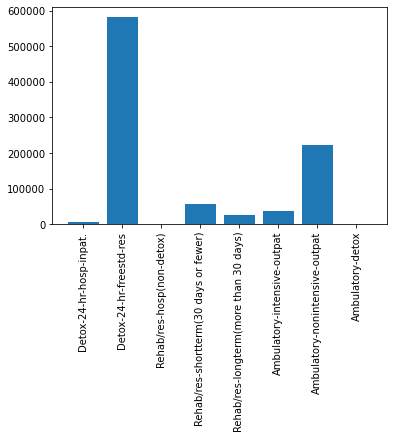

<Figure size 432x288 with 0 Axes>

In [14]:
#Use group by to get data to look at treatment services for Colorado substant abuse treatment

colorado_service_group = colorado_data.groupby('SERVICES').count()
colorado_service_group_sorted = colorado_service_group.sort_index()
bars = ('Detox-24-hr-hosp-inpat.', 'Detox-24-hr-freestd-res', 
       'Rehab/res-hosp(non-detox)', 'Rehab/res-shortterm(30 days or fewer)',
       'Rehab/res-longterm(more than 30 days)', 'Ambulatory-intensive-outpat',
       'Ambulatory-nonintensive-outpat', 'Ambulatory-detox')
colorado_service_group_sorted
#create x and y axes
services = colorado_service_group_sorted.index
num_treatments = colorado_service_group_sorted['CASEID']

# Create bars
plt.bar(services, num_treatments)

# Create names on the x-axis
plt.xticks(services, bars, rotation=90)

# Show graphic
plt.savefig('Output/colorado_treatments_bar.png')
plt.show()

Due to the distribution of data, that detox is by far the most prevalent treatment service, this line of analysis will not be pursued.

In [15]:
#MARFLG is a calculated field in the data.  '1' means the admission gave marijuana/hashish as the primary, secondary, 
# or tertiary drug leading to admission to a treatment program.
marijuana_counts = pd.DataFrame(clean_colorado_data.groupby(['ADMYR'])['MARFLG'].value_counts())

marijuana_counts.rename(columns={"MARFLG":"Number"}, inplace=True)
marijuana_counts.reset_index(inplace=True)


#  create No list
no_marijuana_df = marijuana_counts[marijuana_counts['MARFLG']==0 ]
no_marijuana = no_marijuana_df['Number'].tolist()
#create Yes list
yes_marijuana_df = marijuana_counts[marijuana_counts['MARFLG']==1 ]
yes_marijuana = no_marijuana_df['Number'].tolist()


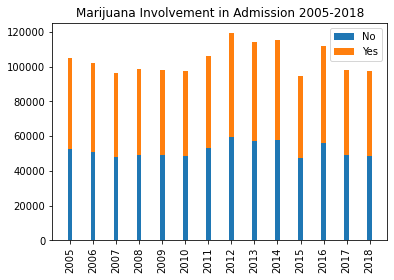

In [34]:
# Create stacked bar chart to compare by year.
# number of years to chart
ind = np.arange(2018-2005+1)
barWidth = .20

p1 = plt.bar(ind, no_marijuana, width=barWidth)
p2 = plt.bar(ind, yes_marijuana, width=barWidth, bottom=no_marijuana)
plt.ylabel = "Marijuana Involved in Admissions"
plt.xlabel = "Year of Admission"
plt.title('Marijuana Involvement in Admission 2005-2018')
plt.xticks(ind, years, rotation=90)
plt.legend((p1[0], p2[0]), ("No", "Yes"), loc="best")
plt.savefig('Output/colorado_marijuana_involvement_bar.png')
plt.show()

There is an uptick in admissions around the time of legalization, so further analysis will look into this data to find patterns. 

In [17]:
#PSYPROB indicates whether the client has co-occurring mental and substance use disorders.  The nature of the disorder
# is not indicated in this data, but can be further analyzed from the 'DSMCRIT' field (summarized below).  However, the two 
# fields are not connected -- the count of those having a psychiatric disorder ('1' in this field) does not match the sum
# of all the diagnoses indicated in the next line.
mh_counts = pd.DataFrame(clean_colorado_data.groupby(['ADMYR'])['PSYPROB'].value_counts())
mh_counts
mh_counts.rename(columns={"PSYPROB":"Number"}, inplace=True)
mh_counts.reset_index(inplace=True)
marijuana_counts

#  create No list
no_mh_df = mh_counts[mh_counts['PSYPROB']==1 ]
no_mh = no_mh_df['Number'].tolist()
#create Yes list
yes_mh_df = mh_counts[mh_counts['PSYPROB']==2 ]
yes_mh = yes_mh_df['Number'].tolist()
print(no_mh)

[8186, 10319, 11295, 12309, 13060, 15433, 17518, 20678, 20821, 26542, 23410, 31171, 31277, 29596]


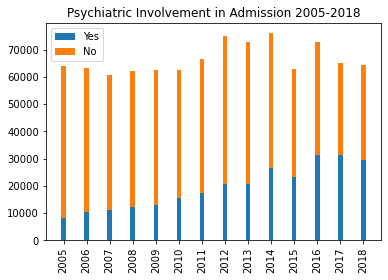

In [18]:
# Create stacked bar chart to compare by year.
# number of years to chart
ind = np.arange(2018-2005+1)
barWidth = .20

p1 = plt.bar(ind, no_mh, width=barWidth)
p2 = plt.bar(ind, yes_mh, width=barWidth, bottom=no_mh)
plt.ylabel = "Other Psychiatric Disorders Involved in Admissions"
plt.xlabel = "Year of Admission"
plt.title('Psychiatric Involvement in Admission 2005-2018')
plt.xticks(ind, years, rotation=90)
plt.legend((p1[0], p2[0]), ("Yes", "No"), loc="upper left")  # 1=Yes, 2=No
plt.savefig('Output/colorado_psychiatric_involvement_bar.png')

<h2>Preliminary Exploration Findings</h2>

This initial exploration has focused on the involvement of marijuana in substance abuse treatment admissions and the co-occurrence of psychiatric factors with substance abuse.  At initial glance, it does not seem that much has changed over time regarding marijuana as an abused substance being involved in treatment admissions.  Although there was a peak in admissions in and right after 2012, the stacked bar chart suggests that admissions have remained within a frame, peaking and falling back with and without marijuana involvement.  

As for psychiatric involvement, the stacked chart suggests that people admitted for substance abuse treatment are diagnosed with concurrent psychiatric problems more frequently over time.  Ashwini will look into this in more detail in her section.  

Further analysis will focus on the involvement of marijuana in substance abuse treatment.  In addition to the flag on which the bar chart is based, numbers of cases and whether primary, secondary, or tertiary involvement are present in the data set.  The detailed analysis will look into this data.

<h1>Marijuana Legalization and Crime</h1>
<h2>Data Load and Segregation of Colorado Data - Arrests</h2>

In [17]:
#Population Datasets
colorado1 = pd.read_csv('co_pop_data.csv')
us_pop = pd.read_csv('nat_pop_data.csv')
oregon1 = pd.read_csv('or_pop_data.csv')
usa_pop = us_pop['United States'].tolist()
or_pop = oregon1['Oregon'].tolist()
co_pop = colorado1['Colorado'].tolist()

In [6]:
co_crime_stats = 'https://api.usa.gov/crime/fbi/sapi/api/data/arrest/states/offense/' + 'CO' + '/all/2006/2019?API_KEY=' + fapi_key

response = requests.get(co_crime_stats)
response_json = response.json()
pretty = json.dumps(response_json)
print('----STATE: CO----')
pprint(pretty, depth=1)

----STATE: CO----
('{"results": [{"aggravated_assault": 5471, "all_other_offenses": 98059, '
 '"arson": 285, "burglary": 3142, "curfew": 2651, "disorderly": 12254, '
 '"driving": 31380, "drug_abuse_gt": 19843, "drug_poss_m": 10419, '
 '"drug_poss_opium": 3241, "drug_poss_other": 3502, "drug_poss_subtotal": '
 '17515, "drug_poss_synthetic": 353, "drug_sales_m": 712, "drug_sales_opium": '
 '771, "drug_sales_other": 604, "drug_sales_subtotal": 2209, '
 '"drug_sales_synthetic": 122, "drunkness": 384, "embezzlement": 192, '
 '"forgery": 1724, "fraud": 2594, "g_all": 0, "g_b": 0, "g_n": 0, "g_t": 5, '
 '"ht_c_s_a": 0, "ht_i_s": 0, "larceny": 19408, "liquor": 17332, '
 '"manslaughter": 5, "mvt": 1923, "murder": 112, "offense_family": 3014, '
 '"prostitution": 499, "prostitution_a_p_p": 0, "prostitution_p": 0, '
 '"prostitution_p_p": 0, "rape": 489, "robbery": 1062, "sex_offense": 1057, '
 '"simple_assault": 16102, "stolen_property": 1232, "suspicion": 23, '
 '"vagrancy": 194, "vandalism": 652

In [7]:
response_json.keys()

dict_keys(['results', 'pagination'])

In [21]:
response_json['results'][0]

{'aggravated_assault': 5471,
 'all_other_offenses': 98059,
 'arson': 285,
 'burglary': 3142,
 'curfew': 2651,
 'disorderly': 12254,
 'driving': 31380,
 'drug_abuse_gt': 19843,
 'drug_poss_m': 10419,
 'drug_poss_opium': 3241,
 'drug_poss_other': 3502,
 'drug_poss_subtotal': 17515,
 'drug_poss_synthetic': 353,
 'drug_sales_m': 712,
 'drug_sales_opium': 771,
 'drug_sales_other': 604,
 'drug_sales_subtotal': 2209,
 'drug_sales_synthetic': 122,
 'drunkness': 384,
 'embezzlement': 192,
 'forgery': 1724,
 'fraud': 2594,
 'g_all': 0,
 'g_b': 0,
 'g_n': 0,
 'g_t': 5,
 'ht_c_s_a': 0,
 'ht_i_s': 0,
 'larceny': 19408,
 'liquor': 17332,
 'manslaughter': 5,
 'mvt': 1923,
 'murder': 112,
 'offense_family': 3014,
 'prostitution': 499,
 'prostitution_a_p_p': 0,
 'prostitution_p': 0,
 'prostitution_p_p': 0,
 'rape': 489,
 'robbery': 1062,
 'sex_offense': 1057,
 'simple_assault': 16102,
 'stolen_property': 1232,
 'suspicion': 23,
 'vagrancy': 194,
 'vandalism': 6525,
 'weapons': 2421,
 'csv_header': None

In [8]:
df_list = []

for i in range(14):
    temp_df = pd.DataFrame(response_json['results'][i], index=[0])
    df_list.append(temp_df)

co_data = pd.concat(df_list)

co_data = co_data.set_index('data_year')
co_data

,aggravated_assault,all_other_offenses,arson,burglary,curfew,disorderly,driving,drug_abuse_gt,drug_poss_m,drug_poss_opium,...,rape,robbery,sex_offense,simple_assault,stolen_property,suspicion,vagrancy,vandalism,weapons,csv_header
data_year,,,,,,,,,,,,,,,,,,,,,
2006,5471,98059,285,3142,2651,12254,31380,19843,10419,3241,...,489,1062,1057,16102,1232,23,194,6525,2421,None
2007,4985,91104,328,2784,2414,12800,29459,19361,11215,2688,...,452,879,895,15428,1059,9,184,6117,2418,None
2008,5407,87941,267,3261,2278,12120,29828,18757,11089,2451,...,498,954,961,15442,792,10,212,6484,2197,None
2009,5542,86135,253,3031,1945,11358,28347,17439,10601,1862,...,466,1129,1007,15148,687,11,167,6095,1977,None
2010,5413,93599,230,2662,1838,11059,29397,16574,10277,1529,...,493,952,895,14481,706,30,401,5563,1844,None
2011,4639,95822,252,2656,1457,10468,29834,16293,10087,1591,...,432,975,929,15290,688,21,194,5493,1839,None
2012,4214,95802,238,2282,1487,9678,27179,16665,9604,1784,...,351,897,693,14303,802,0,307,5174,1800,None
2013,4202,99984,197,2439,1236,10362,28748,12380,4994,1944,...,431,1007,590,15476,646,0,367,5144,1843,None
2014,4413,104316,226,2686,1607,9802,27887,13404,5424,2276,...,463,931,521,16877,319,0,561,5297,2166,None


In [20]:
#Creating Colorado Violent Crime Arrests, Drug Related Arrests, and Petty Crime Arrests. Took amount of arrests, divided by population, and multiplied that number by 100,000 to come up with arrest rate/ 100,000 citizens.
#Violent Crime - Colorado
violent_crime = co_data[['murder', 'rape', 'aggravated_assault', 'robbery', 'manslaughter']]
violent_crime['total_arrests'] = violent_crime.sum(axis=1)
violent_crime['population'] = co_pop
violent_crime['arrest_rate'] = (violent_crime['total_arrests'] / violent_crime['population']) * 100000
violent_crime.reset_index(drop=False, inplace=True)

#Drug Related Crime - Colorado
co_drug_sub = co_data[['drug_poss_subtotal', 'drug_sales_subtotal']]
co_drug_sub['total_arrests'] = co_drug_sub.sum(axis=1)
co_drug_sub['population'] = co_pop
co_drug_sub['arrest_rate'] = (co_drug_sub['total_arrests'] / co_drug_sub['population']) * 100000
co_drug_sub['poss_arrest_rate'] = (co_drug_sub['drug_poss_subtotal']/ co_drug_sub['population'] * 100000)
co_drug_sub['sales_arrest_rate'] = (co_drug_sub['drug_sales_subtotal']/ co_drug_sub['population'] * 100000)
co_drug_sub.reset_index(drop=False, inplace=True)

#Petty Crime - Colorado
co_petty = co_data[['disorderly', 'curfew', 'vandalism', 'stolen_property']]
co_petty['total_arrests'] = co_petty.sum(axis=1)
co_petty['population'] = co_pop
co_petty['arrest_rate'] = (co_petty['total_arrests'] / co_petty['population']) * 100000
co_petty.reset_index(drop=False, inplace=True)
co_petty

,data_year,disorderly,curfew,vandalism,stolen_property,total_arrests,population,arrest_rate
0,2006,12254,2651,6525,1232,22662,4720423,480.084094
1,2007,12800,2414,6117,1059,22390,4803868,466.082748
2,2008,12120,2278,6484,792,21674,4889730,443.255558
3,2009,11358,1945,6095,687,20085,4972195,403.946346
4,2010,11059,1838,5563,706,19166,5047349,379.724089
5,2011,10468,1457,5493,688,18106,5121108,353.556301
6,2012,9678,1487,5174,802,17141,5192647,330.101391
7,2013,10362,1236,5144,646,17388,5269035,330.003502
8,2014,9802,1607,5297,319,17025,5350101,318.218292
9,2015,9036,1334,5419,428,16217,5450623,297.525622


In [23]:
#Oregon FBI API Call

oregon = ['OR']

for state in oregon:
    target_url = 'https://api.usa.gov/crime/fbi/sapi/api/data/arrest/states/offense/' + state + '/all/2007/2019?API_KEY=' + fapi_key
    response = requests.get(target_url)
    print(response)
    or_response_json = response.json()
    states_readable = json.dumps(response_json)
    print(f'----STATE NAME: {state}----')
    print(or_response_json['results'][0])

<Response [200]>
----STATE NAME: OR----
{'aggravated_assault': 3421, 'all_other_offenses': 22193, 'arson': 306, 'burglary': 2979, 'curfew': 2789, 'disorderly': 7801, 'driving': 17474, 'drug_abuse_gt': 19170, 'drug_poss_m': 8445, 'drug_poss_opium': 2890, 'drug_poss_other': 5196, 'drug_poss_subtotal': 17331, 'drug_poss_synthetic': 800, 'drug_sales_m': 552, 'drug_sales_opium': 531, 'drug_sales_other': 656, 'drug_sales_subtotal': 1788, 'drug_sales_synthetic': 49, 'drunkness': 0, 'embezzlement': 63, 'forgery': 1415, 'fraud': 1814, 'g_all': 7, 'g_b': 0, 'g_n': 0, 'g_t': 7, 'ht_c_s_a': 0, 'ht_i_s': 0, 'larceny': 21332, 'liquor': 18770, 'manslaughter': 7, 'mvt': 2077, 'murder': 82, 'offense_family': 626, 'prostitution': 515, 'prostitution_a_p_p': 0, 'prostitution_p': 0, 'prostitution_p_p': 0, 'rape': 303, 'robbery': 1190, 'sex_offense': 1293, 'simple_assault': 15584, 'stolen_property': 690, 'suspicion': 0, 'vagrancy': 24, 'vandalism': 5582, 'weapons': 1935, 'csv_header': None, 'data_year': 200

In [24]:
#Combining with Population Statistics

df_list = []

for i in range(13):
    temp_df = pd.DataFrame(or_response_json['results'][i], index=[0])
    df_list.append(temp_df)

or_data = pd.concat(df_list)
or_data['population'] = or_pop
or_data

,aggravated_assault,all_other_offenses,arson,burglary,curfew,disorderly,driving,drug_abuse_gt,drug_poss_m,drug_poss_opium,...,sex_offense,simple_assault,stolen_property,suspicion,vagrancy,vandalism,weapons,csv_header,data_year,population
0,3421,22193,306,2979,2789,7801,17474,19170,8445,2890,...,1293,15584,690,0,24,5582,1935,None,2007,3722417
0,3507,22421,353,2922,2020,8412,17749,17344,8928,2546,...,1364,15690,383,0,10,5499,1797,None,2008,3768748
0,2970,20491,241,2545,1902,9013,15078,16078,8699,2161,...,1273,14416,399,0,10,4841,1493,None,2009,3808600
0,3120,20086,276,2627,1621,10407,15008,17459,9566,2191,...,1187,13749,371,0,8,4777,1664,None,2010,3837491
0,3232,21084,266,2617,852,10279,15257,19678,10264,2457,...,1173,13747,421,0,0,4686,1777,None,2011,3872036
0,2929,19980,264,2645,1161,10544,14441,20108,9573,2430,...,1168,13394,530,0,11,4342,1789,None,2012,3899001
0,1287,10110,106,999,407,3501,7182,10915,5730,857,...,372,5078,296,0,1,2143,918,None,2013,3922468
0,1987,15363,139,1420,527,6219,8080,14060,5970,1932,...,599,7892,380,0,2,2755,1402,None,2014,3963244
0,2225,19273,165,1492,518,5597,10407,12557,4523,1578,...,527,7502,437,0,1,2825,1363,None,2015,4015792
0,3035,51219,240,1936,567,7443,15315,15621,3394,3146,...,611,11110,603,0,5,4335,1927,None,2016,4089976


In [26]:
#Creating Oregon Violent Crime Arrests, Drug Related Arrests, and Petty Crime Arrests rates. Took amount of arrests, divided by population, and multiplied that number by 100,000 to come up with arrest rate/ 100,000 citizens.
#Violent Crime - Oregon
or_violent_crime = or_data[['murder', 'rape', 'aggravated_assault', 'robbery', 'manslaughter']]
or_violent_crime['total_arrests'] = or_violent_crime.sum(axis=1)
or_violent_crime['population'] = or_pop
or_violent_crime['arrest_rate'] = (or_violent_crime['total_arrests'] / or_violent_crime['population']) * 100000
or_violent_crime.reset_index(drop=False, inplace=True)

#Drug Related Crime - Oregon
or_drug_sub = or_data[['drug_poss_subtotal', 'drug_sales_subtotal']]
or_drug_sub['total_arrests'] = or_drug_sub.sum(axis=1)
or_drug_sub['population'] = or_pop
or_drug_sub['arrest_rate'] = (or_drug_sub['total_arrests'] / or_drug_sub['population']) * 100000
or_drug_sub['poss_arrest_rate'] = (or_drug_sub['drug_poss_subtotal']/ or_drug_sub['population'] * 100000)
or_drug_sub['sales_arrest_rate'] = (or_drug_sub['drug_sales_subtotal']/ or_drug_sub['population'] * 100000)
or_drug_sub.reset_index(drop=False, inplace=True)

#Petty Crime - Oregon
or_petty = or_data[['disorderly', 'curfew', 'vandalism', 'stolen_property']]
or_petty['total_arrests'] = or_petty.sum(axis=1)
or_petty['population'] = or_pop
or_petty['arrest_rate'] = (or_petty['total_arrests'] / or_petty['population']) * 100000
or_petty.reset_index(drop=False, inplace=True)
or_petty

,index,disorderly,curfew,vandalism,stolen_property,total_arrests,population,arrest_rate
0,0,7801,2789,5582,690,16862,3722417,452.985251
1,0,8412,2020,5499,383,16314,3768748,432.875852
2,0,9013,1902,4841,399,16155,3808600,424.171612
3,0,10407,1621,4777,371,17176,3837491,447.584112
4,0,10279,852,4686,421,16238,3872036,419.365936
5,0,10544,1161,4342,530,16577,3899001,425.160188
6,0,3501,407,2143,296,6347,3922468,161.811390
7,0,6219,527,2755,380,9881,3963244,249.315964
8,0,5597,518,2825,437,9377,4015792,233.503130
9,0,7443,567,4335,603,12948,4089976,316.578875


In [28]:
nation_base_url = 'https://api.usa.gov/crime/fbi/sapi/api/data/arrest/national/offense/all/2007/2019?API_KEY=' + fapi_key

response = requests.get(nation_base_url)
response_json = response.json()

df_list = []

for i in range(13):
    temp_df = pd.DataFrame(response_json['results'][i], index=[0])
    df_list.append(temp_df)

nat_data = pd.concat(df_list)
nat_data['population'] = usa_pop

In [31]:
##Creating National Violent Crime Arrests, Drug Related Arrests, and Petty Crime Arrests rates. Took amount of arrests, divided by population, and multiplied that number by 100,000 to come up with arrest rate/ 100,000 citizens.
#National Violent Crime
nat_violent_crime = nat_data[['murder', 'rape', 'aggravated_assault', 'robbery', 'manslaughter']]
nat_violent_crime['total_arrests'] = nat_violent_crime.sum(axis=1)
nat_violent_crime['population'] = usa_pop
nat_violent_crime['arrest_rate'] = (nat_violent_crime['total_arrests'] / nat_violent_crime['population']) * 100000
nat_violent_crime.reset_index(drop=False, inplace=True)

#National Drug Related Crime
nat_drug_sub = nat_data[['drug_poss_subtotal', 'drug_sales_subtotal']]
nat_drug_sub['total_arrests'] = nat_drug_sub.sum(axis=1)
nat_drug_sub['population'] = usa_pop
nat_drug_sub['arrest_rate'] = (nat_drug_sub['total_arrests'] / nat_drug_sub['population']) * 100000
nat_drug_sub['poss_arrest_rate'] = (nat_drug_sub['drug_poss_subtotal']/ nat_drug_sub['population'] * 100000)
nat_drug_sub['sales_arrest_rate'] = (nat_drug_sub['drug_sales_subtotal']/ nat_drug_sub['population'] * 100000)
nat_drug_sub.reset_index(drop=False, inplace=True)

#National Petty Crime
nat_petty = nat_data[['disorderly', 'curfew', 'vandalism', 'stolen_property']]
nat_petty['total_arrests'] = nat_petty.sum(axis=1)
nat_petty['population'] = usa_pop
nat_petty['arrest_rate'] = (nat_petty['total_arrests'] / nat_petty['population']) * 100000
nat_petty.reset_index(drop=False, inplace=True)
nat_petty

,index,disorderly,curfew,vandalism,stolen_property,total_arrests,population,arrest_rate
0,0,566143,114852,232729,95517,1009241,301231207,335.038660
1,0,549364,107186,227687,88791,973028,304093966,319.976096
2,0,531966,91066,219029,85221,927282,306771529,302.271206
3,0,499362,74846,204085,76767,855060,309321666,276.430685
4,0,470788,63444,193188,75222,802642,311556874,257.622947
5,0,450138,62497,186803,80490,779928,313830990,248.518478
6,0,395453,50052,164972,76088,686565,315993715,217.271726
7,0,354710,43374,161196,72555,631835,318301008,198.502356
8,0,322523,36652,156645,73106,588926,320635163,183.674802
9,0,315599,28299,164736,79743,588377,322941311,182.193166


<h1>Marijuana Legalization and Economics</h1>
<h2>Data Load Colorado Data - Sales</h2>

In [25]:
#Load Marijuana Sales Revenue csv
sales_df = pd.read_csv("Resources/marijuana_sales.csv", dtype="object", encoding="utf-8")
sales_df

,Sales Month,Monthly Sales,Year to Date,Monthly Sales.1,Year to Date.1,Monthly Sales.2,Year to Date.2,Total to Date
0,1/1/2014,"$32,541,720","$32,541,720","$14,022,213","$14,022,213","$46,563,933","$46,563,933","$46,563,933"
1,2/1/2014,"$31,738,572","$64,280,292","$14,248,473","$28,270,686","$45,987,045","$92,550,978","$92,550,978"
2,3/1/2014,"$34,821,878","$99,102,170","$19,881,631","$48,152,317","$54,703,509","$147,254,487","$147,254,487"
3,4/1/2014,"$32,686,869","$131,789,039","$20,765,986","$68,918,303","$53,452,855","$200,707,342","$200,707,342"
4,5/1/2014,"$31,355,208","$163,144,247","$21,375,001","$90,293,304","$52,730,209","$253,437,551","$253,437,551"
...,...,...,...,...,...,...,...,...
76,5/1/2020,"$42,989,322","$166,433,459","$149,186,615","$613,043,515","$192,175,937","$779,476,974","$8,567,179,368"
77,6/1/2020,"$40,770,582","$207,204,042","$158,102,628","$771,146,143","$198,873,210","$978,350,185","$8,766,052,578"
78,7/1/2020,"$43,268,565","$250,472,606","$183,106,003","$954,252,146","$226,374,568","$1,204,724,752","$8,992,427,145"
79,8/1/2020,"$42,034,746","$292,507,353","$176,566,595","$1,130,818,741","$218,601,341","$1,423,326,094","$9,211,028,487"


<h2>Data Load Colorado Data - Tax</h2>

In [27]:
#Load Marijuana Tax Revenue csv
tax_df = pd.read_csv("Resources/marijuana_tax.csv", dtype="object", encoding="utf-8")
tax_df

,Date,State Sales Tax,Retail Sales Tax,Retail Excise Tax (15%),License & Fees,Total Taxes & Fees,Total to Date
0,2/1/2014,"$1,330,209","$1,401,568","$195,318","$592,661","$3,519,756","$3,519,756"
1,3/1/2014,"$1,460,429","$1,434,916","$339,615","$857,615","$4,092,575","$7,612,330"
2,4/1/2014,"$1,569,405","$1,898,685","$609,907","$902,995","$4,980,992","$12,593,322"
3,5/1/2014,"$1,559,710","$2,217,607","$734,351","$761,687","$5,273,355","$17,866,677"
4,6/1/2014,"$1,569,454","$2,070,577","$1,135,648","$940,028","$5,715,707","$23,582,384"
...,...,...,...,...,...,...,...
76,6/1/2020,"$1,287,667","$22,814,211","$8,454,927","$1,067,803","$33,624,609","$1,375,145,032"
77,7/1/2020,"$1,288,715","$24,644,660","$9,381,481","$814,882","$36,129,738","$1,411,274,770"
78,8/1/2020,"$1,433,419","$27,794,380","$10,470,917","$996,898","$40,695,613","$1,451,970,383"
79,9/1/2020,"$1,339,939","$26,656,923","$9,682,085","$947,467","$38,626,414","$1,490,596,797"


<h2>Data Load Colorado Data - Employment</h2>

In [29]:
# Read CSV
CO_Medical = pd.read_csv("Data/Stores - Medical.csv")
CO_Retail = pd.read_csv("Data/Stores - Retail.csv")
Lat_Long = pd.read_csv("Data/us-zip-code-latitude-and-longitude.csv", sep=';')
State_Employment = pd.read_csv("Data/EmploymentByState.csv")

In [30]:
CO_Medical.head()

,LicenseNumber,FacilityName,DBA,FacilityType,City,ZipCode,DateUpdated
0,402-00001,ALLGREENS LLC,NaN,MMC,Denver,80204,2020-12-01
1,402-00002,ALTERNATIVE MEDICINE ON CAPITOL HILL LLC,NaN,MMC,Denver,80218,2020-12-01
2,402-00005,P2C3 LLC,THE SECRET STASH,MMC,Colorado Springs,80904,2020-12-01
3,402-00008,HERBAL OUTFITTERS LLC,THE GREEN JOINT,MMC,Rifle,81650,2020-12-01
4,402-00011,JGB VENTURES LLC,DANK,MMC,Denver,80207,2020-12-01


In [31]:
CO_Retail.head()

,LicenseNumber,FacilityName,DBA,FacilityType,City,ZipCode,DateUpdated
0,402R-00004,JGB VENTURES LLC,DANK,Retail Marijuana Store,Denver,80207,2020-12-01
1,402R-00005,CANOSA PROPERTY INVESTMENTS LLC,BOTANICO 2,Retail Marijuana Store,Denver,80204,2020-12-01
2,402R-00002,CENTRAL LLC,BONFIRE CANNABIS,Retail Marijuana Store,Central City,80427,2020-12-01
3,402R-00003,5110 SANCTUARY LLC,EVERBLOOM,Retail Marijuana Store,Denver,80216,2020-12-01
4,402R-00007,L3ASTOCKCOMPLEX LLC,EUFLORA,Retail Marijuana Store,Denver,80216,2020-12-01


In [32]:
Lat_Long.head()


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,66025,Eudora,KS,38.917032,-95.06455,-6,1,"38.917032,-95.06455"
1,74565,Savanna,OK,34.831398,-95.83967,-6,1,"34.831398,-95.83967"
2,75631,Beckville,TX,32.237924,-94.46427,-6,1,"32.237924,-94.46427"
3,92067,Rancho Santa Fe,CA,33.016492,-117.20264,-8,1,"33.016492,-117.20264"
4,92119,San Diego,CA,32.802250,-117.02431,-8,1,"32.80225,-117.02431"


In [33]:
State_Employment.head()

,2017,2018,2019,2020
0,23407,26891,31486,34705
